In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we create different test data for computing the kernel sizes on.

In [2]:
#test data stuff - to go to dataloader
def gaussian_disk():
    """
        Generate a random point in the unit disk using Gaussian sampling.
    """
    point = np.random.normal(loc=0.0, scale=1.0, size=2)
    norm_point = np.linalg.norm(point)
    scaled_point = point / norm_point * np.random.uniform(0, 1)**(1/2)
    return scaled_point

def gaussian_ball():
    """
        Generate a random point in the unit ball using Gaussian sampling.
    """
    point = np.random.normal(loc=0.0, scale=1.0, size=3)
    norm_point = np.linalg.norm(point)
    scaled_point = point / norm_point * np.random.uniform(0, 1)**(1/3)
    return scaled_point

def uniform_ball():
    """
        Generate a random point in the unit ball using uniform sampling with respect to the l2 norm.
    """
    point = np.random.uniform(low=-1.0, high=1.0, size=3)
    norm_point = np.linalg.norm(point, ord=2)
    scaled_point = point / norm_point* np.random.uniform(0, 1)**(1/3)
    return scaled_point

# Function to generate random points within a 3D ball of radius R
def random_uni_points_in_ball(R, num_points, center = (0, 0, 0), dim=3):
    """
        Generate random points uniformly distributed in a ball of radius R in 'dim' dimensions.
    """
    points = []
    for _ in range(num_points):
        # generate a random point from a 3D Gaussian distribution
        point = uniform_ball()
        # scale the point to be within the ball
        scaled_point = R*point
        points.append(scaled_point)
    return np.array(points)

def cutoff_and_rescale_noise(noise, cutoff_radius):
    """
    Cutoff noise vectors that exceed the given radius and rescale them.

    Arguments:
    - noise: (N, d) array of sampled noise vectors.
    - cutoff_radius: The threshold norm for noise.

    Returns:
    - Adjusted noise with norm constraint.
    """
    norms = np.linalg.norm(noise, axis=1)
    mask = norms > cutoff_radius  # Identify outliers

    # Rescale the noise vectors that exceed the cutoff
    noise[mask] = noise[mask] / norms[mask, np.newaxis] * cutoff_radius

    return noise

# Function to generate random points within a 3D ball of radius R
def random_points_in_ball(R, num_points, center = (0, 0, 0), dim=3):
    """
        Generate random points uniformly distributed in a ball of radius R in 'dim' dimensions.
    """
    points = []
    for _ in range(num_points):
        # generate a random point from a 3D Gaussian distribution
        point = gaussian_ball()
        # scale the point to be within the ball
        scaled_point = R*point
        points.append(scaled_point)
    return np.array(points)


def random_points_in_ball_with_noise(R, num_points, noise_std=0.1, dim=3):
    """
        Generate random points uniformly distributed in a ball of radius R in 'dim' dimensions
        and add Gaussian noise.
    """
    points = random_points_in_ball(R, num_points, dim)
    noise = np.random.normal(0, noise_std, size=points.shape)
    noisy_points = points + noise
    return noisy_points

def random_points_in_ball_with_cutoff_noise(R, num_points, noise_std=0.1, cutoff=0.2, dim=3):
    """
    Generate random points uniformly distributed in a ball of radius R in 'dim' dimensions
    and add Gaussian noise with a cutoff and rescaling.

    Arguments:
    - R: Radius of the ball.
    - num_points: Number of points to generate.
    - noise_std: Standard deviation of the noise.
    - cutoff: Maximum allowable norm for noise.
    - dim: Dimensionality of the space (default 3).

    Returns:
    - Noisy points inside the ball with constrained noise.
    """
    points = random_points_in_ball(R, num_points, dim=dim)
    noise = np.random.normal(0, noise_std, size=points.shape)
    
    # Apply cutoff and rescaling
    noise = cutoff_and_rescale_noise(noise, cutoff)

    noisy_points = points + noise
    return noisy_points


# Function to generate random points in the disk of radius R - 2d or 3d
def random_points_in_disk(R, num_points):
    """
        Generate random points within a 2D disk using Gaussian sampling.

        Arguments:
        - radius: The radius of the disk.
        - num_points: Number of random points to sample.

        Returns:
        - points: Randomly sampled points within the disk.
    """
    points = []

    for _ in range(num_points):
        # generate a random point from a 2D Gaussian distribution
        point = gaussian_disk()
        # scale the point to be within the disk
        scaled_point = R*point
        points.append(scaled_point)
    # Return points as an array of shape (num_points, 2)
    return np.array(points)

def random_points_in_disk_with_noise(R, num_points, noise_std=0.1):
    """
        Generate random points within a 2D disk and add Gaussian noise.
    """
    points = random_points_in_disk(R, num_points)
    noise = np.random.normal(0, noise_std, size=points.shape)
    noisy_points = points + noise
    return noisy_points

def random_points_in_disk_with_cutoff_noise(R, num_points, noise_std=0.1, cutoff=0.2):
    """
    Generate random points uniformly distributed in a disk of radius R in '2D' dimensions
    and add Gaussian noise with a cutoff and rescaling.

    Arguments:
    - R: Radius of the disk.
    - num_points: Number of points to generate.
    - noise_std: Standard deviation of the noise.
    - cutoff: Maximum allowable norm for noise.

    Returns:
    - Noisy points inside the disk with constrained noise.
    """
    points = random_points_in_disk(R, num_points)
    noise = np.random.normal(0, noise_std, size=points.shape)
    
    # Apply cutoff and rescaling
    noise = cutoff_and_rescale_noise(noise, cutoff)

    noisy_points = points + noise
    return noisy_points

def random_points_in_ellipse(a, b, num_points):
    """
        Generate random points within a 2D ellipse using Gaussian sampling.

        Arguments:
        - a: Semi-major axis length.
        - b: Semi-minor axis length.
        - num_points: Number of random points to sample.

        Returns:
        - points: Randomly sampled points within the ellipse.
    """
    points = []
    for _ in range(num_points):
        gaussian_point = gaussian_disk()
        ellipse_point = np.array([a*gaussian_point[0], b*gaussian_point[1]])
        points.append(ellipse_point)
    return np.array(points)

def random_points_in_ellipse_with_noise(a, b, num_points, noise_std=0.1):
    """
        Generate random points within a 2D ellipse and add Gaussian noise.
    """
    points = random_points_in_ellipse(a, b, num_points)
    noise = np.random.normal(0, noise_std, size=points.shape)
    noisy_points = points + noise
    return noisy_points

def random_points_in_ellipsoid(a, b, c, num_points):
    """
        Generate random points within a 3D ellipsoid using Gaussian sampling.

        Arguments:
        - a: Semi-principal axis along the x-axis.
        - b: Semi-principal axis along the y-axis.
        - c: Semi-principal axis along the z-axis.
        - num_points: Number of random points to sample.

        Returns:
        - points: Randomly sampled points within the ellipsoid.
    """
    points = []
    for _ in range(num_points):
        gaussian_point = gaussian_ball()
        ellipsoid_point = np.array([a*gaussian_point[0], b*gaussian_point[1], c*gaussian_point[2]])
        points.append(ellipsoid_point)
    return np.array(points)

def random_points_in_ellipsoid_with_noise(a, b, c, num_points, noise_std=0.1):
    """
        Generate random points within a 3D ellipsoid and add Gaussian noise.
    """
    points = random_points_in_ellipsoid(a, b, c, num_points)
    noise = np.random.normal(0, noise_std, size=points.shape)
    noisy_points = points + noise
    return noisy_points

def random_points_in_ellipsoid_with_cutoff_noise(a, b, c, num_points, noise_std=0.1, cutoff=0.2):
    """
    Generate random points in an ellipsoid and add Gaussian noise with cutoff and rescaling.

    Arguments:
    - a, b, c: Semi-axes of the ellipsoid.
    - num_points: Number of points to generate.
    - noise_std: Standard deviation of the noise.
    - cutoff: Maximum allowable norm for noise.

    Returns:
    - Noisy points inside the ellipsoid with constrained noise.
    """
    points = random_points_in_ellipsoid(a, b, c, num_points)
    noise = np.random.normal(0, noise_std, size=points.shape)
    
    # Apply cutoff and rescaling
    noise = cutoff_and_rescale_noise(noise, cutoff)

    noisy_points = points + noise
    return noisy_points

In [3]:
#subsample k points from array
def subsample_points(input_data, number_samples):
    """ Subsample k points from input data"""

In [4]:
# Function to apply matrix transformation A to points
def apply_forwardmodel(A, points):
    return np.dot(points, A.T)

def projection_nullspace_operator(A):
    """Compute the matrix for projecting onto the null space of a matrix A, i.e. P_{N(A)}= (I - A^dagger A)
    Args: 
        - A: matrix 
    Returns:
        - project_ns: matrix projecting onto the null space of A.
    """
    A_dagger = np.linalg.pinv(A)
    project_ns= np.eye(A.shape[1]) - np.dot(A_dagger, A)
    return project_ns


def projection_nullspace(A, x):
    """
        Compute the projection of a point x onto the null space of A, i.e., P_{N(A)}(x).
        This is equivalent to (I - A^dagger A) x usin the function projection_nullspace for computing P_{N(A)} from A.
    """
    project_ns = projection_nullspace_operator(A)
    x_ns = np.dot(project_ns,x)
    
    return x_ns

In [5]:
def compute_feasible_set(A, input_data_point, target_data, q, epsilon):
    """
    Implements the iterative algorithm for estimating feasible sets for one input point based on possible target data points for a noisy inverse problem. 
        Arguments:
        - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
        - input_data_point: Input data point, referred to as "y" in variable names, for an approximate inverse method.
        - target_data: Target or ground truth data for an approximate inverse method.
        - q: order of the norm on the input dataset, default q=2 for MSE computation.
        - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.

        Returns:
        - feas_set_approx: approximation to the feasible set, consisting of all target data points that can map to an input data point within the noise level.
    """

    # Step 2: Compute feasible set for input data point y
    feas_set_y = []

    for x_n in target_data:
        e_n = input_data_point - np.dot(A,x_n) # Compute noise vector

        if np.linalg.norm(e_n,q) <= epsilon:  # Check if noise is below noiselevel
            # add traget data point x_n to feasible set
            feas_set_y.append(x_n)

    return feas_set_y

In [6]:
def diams_feasibleset_inv(A, input_data_point, target_data, p, epsilon):
    """
    Implements the iterative algorithm for diameter estimation of the feasible set for a noisy inverse problem. 
    Computes diameter based on possible target data points for one input point.
        Arguments:
        - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
        - input_data_point: Input data point, referred to as "y" in variable names, for an approximate inverse method.
        - target_data: Target or ground truth data for an approximate inverse method.
        - p: order of the norm on the target dataset, default p=2 for MSE computation.
        - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.

        Returns:
        - diameter_mean_y, num_feas, max_diam_Fy: diameter_mean_y of dim(0)= shape(input_data), the estimated mean diameter of the feasible set, 
                                        consisting of all possible target data points, for one input point.
                                        num_feas is the number of samples in the feasible set and will be used for statistics later on.
                                        max_diam_Fy the maximum diameter of the feasible set, 
                                        consisting of all possible target data points, for one input point.
    """

    # Step 2: Compute feasible sets and diameters
    feas_set_y = compute_feasible_set(A, input_data_point, target_data, p, epsilon)
    max_diam_Fy = 0
    diameter_mean_y = 0
    diam_y = []
    # obtain number of samples in feasible set (num_feas will be used for statistics later on)
    num_feas = len(feas_set_y)

    # compute diameters
    for h in range(0,num_feas,1):
        for j in range(0,h+1,1):
            #compute vectors in null space of F and their norm
            dist_ns = feas_set_y[h]-feas_set_y[j]
            diameter= np.linalg.norm(dist_ns, ord = p)

            #add to diam_y 
            diam_y.append(diameter)

            #get ascending diams
            if diameter > max_diam_Fy:
                max_diam_Fy = diameter
                            
    # get mean over diams, with factor 2 due to symmetry of the norm of the compute vectors in null space of F (norm(x-z)=norm(z-x))
    # and divided by num_feas^2 ad we have that many terms
    if num_feas > 0:      
        # compute 2 times sum over diams to the power p divided by num_feas^2
        diameter_mean_y = 2*np.divide(np.sum(np.power(diam_y,p)), np.power(num_feas,2))
    elif num_feas==0:
        diameter_mean_y = 0  

    return diameter_mean_y, num_feas, max_diam_Fy

In [7]:
def diams_feasibleset_inv_sym(A, input_data_point, target_data, p,q, epsilon):
    """
    Implements the iterative algorithm for diameter estimation of the feasible set for a noisy inverse problem under the assumption that 
    there exists noise vectors such that the target data is symmetric with respect to the null space of F= (A |I): P_{N(F)^perp}(x,e)-P_{N(F)}(x,e). 
    Computes diameter based on possible target data points for one input point.
        Arguments:
        - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
        - input_data_point: Input data point, referred to as "y" in variable names, for an approximate inverse method.
        - target_data: Target or ground truth data for an approximate inverse method.
        - p: order of the norm on the target dataset, default p=2 for MSE computation.
        - q: order of norm on the input dataset.
        - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.

        Returns:
        - diameter_mean_y, num_feas, max_diam_Fy: diameter_mean_y of dim(0)= shape(input_data), the estimated mean diameter of the feasible set, 
                                        consisting of all possible target data points, for one input point.
                                        num_feas is the number of samples in the feasible set and will be used for statistics later on.
                                        max_diam_Fy the maximum diameter of the feasible set, 
                                        consisting of all possible target data points, for one input point.
    """
    # Compute Moore-Penrose-Inverse of F
    F = np.hstack((A, np.eye(A.shape[0])))  # Construct F: (A | I) 
    proj_ns_F = projection_nullspace_operator(F)

    # Step 2: Compute feasible sets and diameters
    max_diam_Fy = 0
    diameter_mean_y = 0
    diam_y = []

    for x_n in target_data:
        xcomp = len(x_n)-1
        e_n = input_data_point - np.dot(A,x_n) # Compute noise vector

        if np.linalg.norm(e_n,q) <= epsilon:  # Check if noise is below noiselevel
            # Project onto the null space of F
            proj_nullspace = np.dot(proj_ns_F, np.hstack((x_n, e_n)))[0:xcomp] # Project (x_n, e_n) onto nullspace of F, only take dim of x_n

            # Compute diameter of feasible set based on projection onto null space
            diameter = 2 * np.linalg.norm(proj_nullspace, ord = p)   

            #add to diam_y 
            diam_y.append(diameter)

            #get ascending diams
            if diameter > max_diam_Fy:
                max_diam_Fy = diameter
                
    # obtain number of samples in feasible set (num_feas will be used for statistics later on)
    num_feas = len(diam_y)        
    # get mean over diams 
    if num_feas > 0:      
        diameter_mean_y = np.mean(np.power(diam_y,p))

    return diameter_mean_y, num_feas, max_diam_Fy

In [8]:
def wc_kernelsize(A, input_data, target_data, p,q, epsilon):
    """
    Computes the worst-case kernel size for noisy inverse problem using Algorithm 1.

    Args:
        - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
        - input_data: Input data for an approximate inverse method.
        - target_data: Target or ground truth data for an approximate inverse method.
        - p: order of the norm on the target dataset, default p=2 for MSE computation.
        - q: order of norm on the input dataset.
        - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.

    Returns:
        Approximate worst-case kernel size for a set of input data samples.
    """
    wc_kersize =0

    for y in input_data:
        # compute diameter of feasible set for one input data point
        diameter_mean_y, num_feas, max_diam_Fy = diams_feasibleset_inv(A, y, target_data, p, epsilon)
        if max_diam_Fy > wc_kersize:
            wc_kersize = max_diam_Fy
    
    return wc_kersize

In [9]:
def av_kernelsize(A, input_data, target_data, p,q, epsilon):
    """
    Computes the average kernel size for a noisy inverse problem under Algorithm 2.

    Args:
        - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
        - input_data: Input data for an approximate inverse method.
        - target_data: Target or ground truth data for an approximate inverse method.
        - p: order of the norm on the target dataset, default p=2 for MSE computation.
        - q: order of norm on the input dataset.
        - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.

    Returns:
        Approximate average kernel size for for a set of input data samples.
    """

    av_kersizep = 0
    num_samples = len(input_data)

    for y in input_data:
        # compute diameter of feasible set for one input data point (num_feas will be used for statistics later on)
        diameter_mean_y, num_feas, max_diam_Fy = diams_feasibleset_inv_sym(A, y, target_data, p,q, epsilon)
        #add diameters means for obtaining average kersize to the power p
        av_kersizep = av_kersizep + diameter_mean_y
        
    # get mean over input data
    av_kersize = np.divide(av_kersizep, num_samples)    
    # take power 1/p to obtain average kersize
    av_kersize =  np.power(av_kersize, 1/p)
    
    return av_kersize


In [10]:
def plot_wckersize_conv(wc_kersizef, kersize_approxis, ker_size, max_k):

    # Plot results
    x_axis = np.arange(2, max_k+1)
    y_axis = np.array(kersize_approxis)
    plt.plot(x_axis, y_axis)
    plt.axhline(ker_size, color='r')
    plt.ylim(0, ker_size + 0.1 * ker_size)
    plt.grid()
    plt.xlabel("Number of samples")
    plt.ylabel("Approximate  wc kernel size")
    plt.title("Number of Samples vs wc Kernel Size")
    plt.show()

    #max_diameter_total = max(max_diameters)
    print(f"Total Max Kernel Size: { wc_kersizef}")
    print(f"Analytical Kernel Size: {ker_size}")
    rel_error = (wc_kersizef - ker_size) / ker_size
    print(f"Relative Error: {rel_error}")

In [11]:
def plot_avkersize_conv(av_kersize, av_kersizes, ker_size, max_k):

    # Plot results
    x_axis = np.arange(2, max_k+1)
    y_axis = np.array(av_kersizes)
    plt.plot(x_axis, y_axis)
    plt.axhline(ker_size, color='r')
    plt.ylim(0, ker_size + 0.3 * ker_size)
    plt.grid()
    plt.xlabel("Number of samples")
    plt.ylabel("Approximate average kernel size")
    plt.title("Number of Samples vs Av. Kernel Size")
    plt.show()

    #max_diameter_total = max(max_diameters)
    print(f"Total Max Kernel Size: {av_kersize}")
    print(f"Analytical Kernel Size: {ker_size}")
    rel_error = (av_kersize - ker_size) / ker_size
    print(f"Relative Error: {rel_error}")

In [12]:
def av_kersizes_over_samples_sizes(A, input_data_loads, target_data, p,q, epsilon):
    """Computes the average kernel size for a noisy inverse problem under Algorithm 2.
        Args:
            - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
            - input_data: Input data for an approximate inverse method.
            - target_data: Target or ground truth data for an approximate inverse method.
            - p: order of the norm on the target dataset, default p=2 for MSE computation.
            - q: order of norm on the input dataset.
            - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.
        Returns:
            Average kernel sizes for sample sizes of input data. """
    
    av_kersizes =[]

    for input_data in input_data_loads:
        av_kersize = av_kernelsize(A, input_data, target_data, p,q, epsilon)
        av_kersizes.append(av_kersize)
    
    return av_kersizes   

In [13]:
def wc_kersizes_over_samples_sizes(A, input_data_loads, target_data, p,q, epsilon):
    """Computes the worst-case kernel size for a noisy inverse problem under Algorithm 2.
        Args:
            - A: The matrix (for which we are computing the Moore-Penrose inverse) of the inverse problem input_data = A(target_data)+noise.
            - input_data: Input data for an approximate inverse method.
            - target_data: Target or ground truth data for an approximate inverse method.
            - p: order of the norm on the target dataset, default p=2 for MSE computation.
            - q: order of norm on the input dataset.
            - epsilon: Noise level in the inverse problem input_data = A(target_data)+noise.
        Returns:
            Worst-case kernel sizes for sample sizes of input data. """
    
    wc_kersizes =[]

    for input_data in input_data_loads:
        wc_kersize = wc_kernelsize(A, input_data, target_data, p,q, epsilon)
        wc_kersizes.append(wc_kersize)
    
    return wc_kersizes  

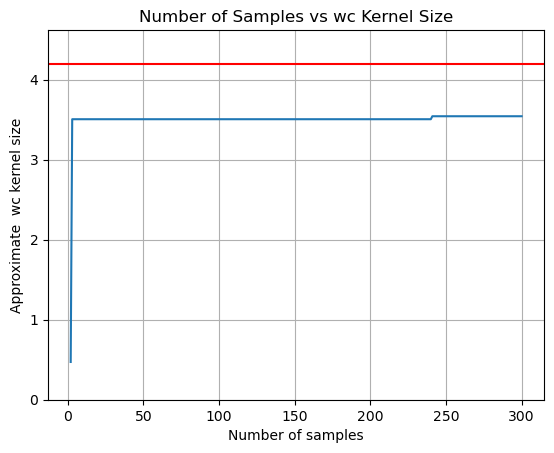

Total Max Kernel Size: 3.5435123047329586
Analytical Kernel Size: 4.2
Relative Error: -0.15630659411120035


In [14]:
# check if P_{N(A)}(M_1) of first toy example set is symmetric

# Toy example 1

R = 2  # Radius of the ball
num_points = 500  # Number of points in the set M_1
A = np.diag([1, 1, 0])  # Transformation matrix
p=2
q=2
epsilon=1e-1
#analytical kersize
ker_size = 2*R+2*epsilon


# Generate points in B_R(0)
target_data = random_points_in_ball(R+epsilon, num_points)
input_data =  apply_forwardmodel(A, target_data)

# Set the range of k values
max_k = 300

wc_kersizes = []
for k in range(1,max_k,1):
    input_data_k = input_data[0:k,:]
    wc_kersize_k = wc_kernelsize(A, input_data_k, target_data, p,q, epsilon)
    wc_kersizes.append(wc_kersize_k)

wc_kersizef = wc_kersizes[-1]

plot_wckersize_conv(wc_kersizef, wc_kersizes, ker_size, max_k)


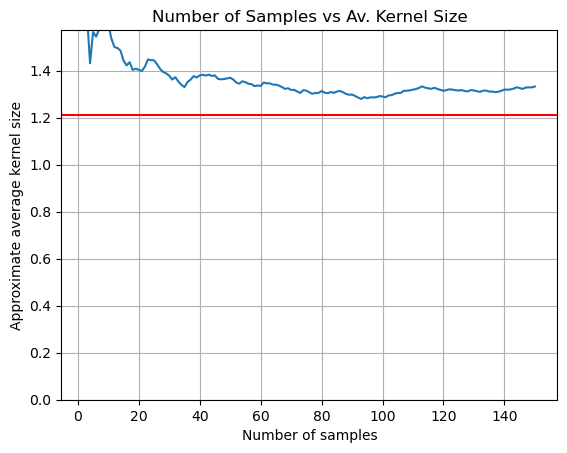

Total Max Kernel Size: 1.3330751066682345
Analytical Kernel Size: 1.21
Relative Error: 0.10171496418862357


In [15]:

# Toy example 1

R = 2  # Radius of the ball
num_points = 1000  # Number of points in the set M_1
A = np.diag([1, 1, 0])  # Transformation matrix
#analytical kersize
ker_size = 2*R
av_ker_size = 1.21 # value of av ker over pushforward measure is (R+epsilon)*sqrt(1/3)
p=2
q=2
epsilon=1e-1

# Generate points in B_R(0) use uniformly sampled points, 
# as av_ker_size is analytically caculated wrt the Lebesgue measure
target_data = random_uni_points_in_ball(R+epsilon, num_points)
#noise = np.random.uniform(0, epsilon, size=target_data.shape)
input_data =  apply_forwardmodel(A, target_data) #+noise

# Set the range of k values
max_k = 150

av_kersizes = []
for k in range(1,max_k,1):
    input_data_k = input_data[0:k,:]
    av_kersize_k = av_kernelsize(A, input_data_k, target_data, p,q, epsilon)
    #print(av_kersize_k)
    av_kersizes.append(av_kersize_k)

av_kersizef = av_kersizes[-1]

plot_avkersize_conv(av_kersizef, av_kersizes, av_ker_size, max_k)